## Importamos librerías

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

Vamos a hacer un estudio de la encuesta esta

In [18]:
### cogemos el dataframe (habrá que leerlo de algún sitio), mientras tanto me lo invento
lst1 = ["Jaime","Raquel","Josema","Marta","Laura","Cristina","Gonzalo","Elena","Javi","Dani","Ruben"]
lst2 = [1,4,5,7,7,5,6,2,2,4,4]
lst3 = [2,3,4,5,6,7,7,7,5,5,5]
lst4 = [2,3,1,2,3,4,4,4,6,6,6]
lst5 = [3,2,4,5,7,9,9,9,np.nan,6,6]

df = pd.DataFrame(list(zip(lst1,lst2,lst3,lst4,lst5)), columns = ['Nombre','Variable1','Variable2','Variable3','Variable4'])



Comprobamos la calidad de los datos

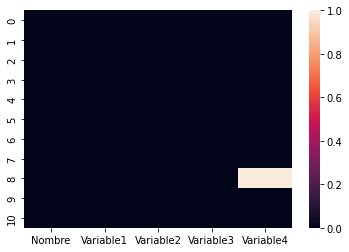

In [19]:
## vemos gráficamente si hay algún nulo

sns.heatmap(df.isna(),vmin = 0,vmax = 1)

In [20]:
## tambien podemos hacer los siguiente:

## donde se ve el número de nulos que hay por variable

df.isna().sum()

Nombre       0
Variable1    0
Variable2    0
Variable3    0
Variable4    1
dtype: int64

Creamos matriz de correlaciones con Spearman (que es para escalas tipo likert va bien)

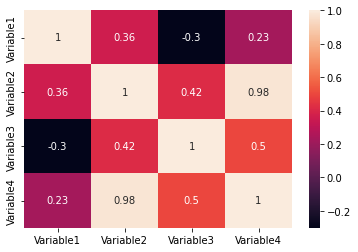

In [13]:
matriz_correlaciones = df.corr(method = 'spearman')

sns.heatmap(matriz_correlaciones,annot = True)

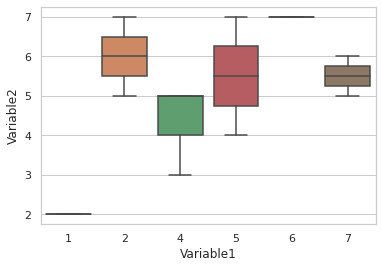

In [23]:
## ahora cogemos y hacemos boxplots por variables para ver cómo evolucionan

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Variable1", y="Variable2", data=df)